In [1]:
from load_preprocess.functions import Data
from load_preprocess.predictions import Number_Stations
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
# import config
import json
import numpy as np

from shapely.geometry import LineString, mapping
from itertools import combinations
import re
from scipy import spatial


In [2]:
data = Data(path = 'data/')
df = data.create_df()

df.head(10)

100%|██████████| 8/8 [00:42<00:00,  5.30s/it]


,region,road_density,length_m,area_m,length_max,length_mean,diameter,longest_line
3,Île-de-France,0.000227,2.744410e+06,1.206353e+10,85932.399845,3076.692877,123934.499714,162432.991960
15,Nord-Pas-de-Calais,0.000151,1.887368e+06,1.249483e+10,147881.271737,4015.676440,126130.541927,208410.677869
10,Haute-Normandie,0.000113,1.398489e+06,1.237197e+10,135138.054662,4994.602982,125508.904876,163440.964713
0,Alsace,0.000106,8.836421e+05,8.322648e+09,171172.687144,4374.466068,102940.396161,188809.381774
17,Picardie,0.000093,1.822331e+06,1.954720e+10,163238.986421,7854.875311,157760.172316,218702.689596
20,Rhône-Alpes,0.000090,4.039422e+06,4.497380e+10,203474.560283,4047.517513,239295.676544,319508.048270
13,Lorraine,0.000085,2.007468e+06,2.366142e+10,189457.934215,4562.427574,173570.336256,235280.099059
6,Bretagne,0.000085,2.333729e+06,2.760417e+10,244626.451176,4037.593151,187474.602114,285248.867037
4,Basse-Normandie,0.000078,1.386823e+06,1.780635e+10,122829.920651,3688.358818,150571.399619,263736.945386
16,Pays de la Loire,0.000077,2.480511e+06,3.233398e+10,228887.324618,6852.239326,202901.214557,276408.162313


In [3]:
stations_num = Number_Stations(df_data=df, path_conf='params/config.json', length_to_use='longest_line', scenario="scenario1")
df_f = stations_num.final_station_calculation()

df_f.head(10)

,region,road_density,length_m,area_m,length_max,length_mean,diameter,longest_line,perc_load,max_length_drive,...,R_2030_total,C_2030,h2_num_2040,R_2040_high_aut,R_2040_mid_aut,R_2040_low_aut,R_2040_total,C_2040,num_stations_2030,num_stations_2040
0,Île-de-France,0.000227,2.744410e+06,1.206353e+10,85.932400,3.076693,123.934500,162.432992,0.097211,720,...,210.603356,56.451613,4841.121182,259.498073,691.994862,97.311778,1048.804713,56.451613,4,19
1,Nord-Pas-de-Calais,0.000151,1.887368e+06,1.249483e+10,147.881272,4.015676,126.130542,208.410678,0.066784,720,...,185.638899,56.451613,3325.859722,228.737744,609.967318,85.776654,924.481716,56.451613,3,16
2,Haute-Normandie,0.000113,1.398489e+06,1.237197e+10,135.138055,4.994603,125.508905,163.440965,0.039934,720,...,87.051273,56.451613,1988.699295,107.261527,286.030740,40.223073,433.515340,56.451613,2,8
3,Alsace,0.000106,8.836421e+05,8.322648e+09,171.172687,4.374466,102.940396,188.809382,0.029967,720,...,75.464104,56.451613,1492.353678,92.984224,247.957930,34.869084,375.811238,56.451613,1,7
4,Picardie,0.000093,1.822331e+06,1.954720e+10,163.238986,7.854875,157.760172,218.702690,0.040049,720,...,116.821359,56.451613,1994.449490,143.943184,383.848492,53.978694,581.770370,56.451613,2,10
5,Rhône-Alpes,0.000090,4.039422e+06,4.497380e+10,203.474560,4.047518,239.295677,319.508048,0.113242,720,...,482.575254,56.451613,5639.468248,594.612313,1585.632834,222.979617,2403.224764,56.451613,9,43
6,Lorraine,0.000085,2.007468e+06,2.366142e+10,189.457934,4.562428,173.570336,235.280099,0.030442,720,...,95.527101,56.451613,1515.989921,117.705145,313.880388,44.139430,475.724963,56.451613,2,8
7,Bretagne,0.000085,2.333729e+06,2.760417e+10,244.626451,4.037593,187.474602,285.248867,0.066443,720,...,252.783700,56.451613,3308.872625,311.471215,830.589907,116.801706,1258.862828,56.451613,4,22
8,Basse-Normandie,0.000078,1.386823e+06,1.780635e+10,122.829921,3.688359,150.571400,263.736945,0.024451,720,...,86.008770,56.451613,1217.661778,105.976991,282.605310,39.741372,428.323673,56.451613,2,8
9,Pays de la Loire,0.000077,2.480511e+06,3.233398e+10,228.887325,6.852239,202.901215,276.408162,0.078611,720,...,289.808023,56.451613,3914.843916,357.091288,952.243435,133.909233,1443.243956,56.451613,5,26


In [4]:
df_f.num_stations_2030.sum(), df_f.num_stations_2040.sum()

(61, 307)

In [6]:
stations_num.save_predictions(df_f)

In [18]:
stations_num.get_scenario_output(df_f)

The output for scenario3 is 93 for 2030 and 276 for 2040.
Region Île-de-France: 6 stations for 2030 and 17 for 2040
Region Nord-Pas-de-Calais: 5 stations for 2030 and 15 for 2040
Region Haute-Normandie: 2 stations for 2030 and 7 for 2040
Region Alsace: 2 stations for 2030 and 6 for 2040
Region Picardie: 3 stations for 2030 and 9 for 2040
Region Rhône-Alpes: 13 stations for 2030 and 38 for 2040
Region Lorraine: 3 stations for 2030 and 8 for 2040
Region Bretagne: 7 stations for 2030 and 20 for 2040
Region Basse-Normandie: 2 stations for 2030 and 7 for 2040
Region Pays de la Loire: 8 stations for 2030 and 23 for 2040
Region Champagne-Ardenne: 4 stations for 2030 and 11 for 2040
Region Provence-Alpes-Côte d'Azur: 6 stations for 2030 and 19 for 2040
Region Poitou-Charentes: 4 stations for 2030 and 11 for 2040
Region Languedoc-Roussillon: 4 stations for 2030 and 11 for 2040
Region Franche-Comté: 1 stations for 2030 and 4 for 2040
Region Centre: 5 stations for 2030 and 14 for 2040
Region Bour

Part 2

In [2]:
data = Data(path = 'data/')

In [3]:
shap_files = data.get_shapefiles()

100%|██████████| 10/10 [00:35<00:00,  3.57s/it]


In [4]:
csvs = data.get_csvs()

100%|██████████| 14/14 [00:03<00:00,  3.63it/s]


In [5]:
jsons = data.get_jsons()

100%|██████████| 4/4 [00:00<00:00, 114.28it/s]


In [6]:
from station_finder.functions import StationLocator
station_locator = StationLocator(shap_files, csvs)
sorted_locations = station_locator.get_best_location(grid_size=10_000)

100%|██████████| 9118/9118 [36:26<00:00,  4.17it/s]  


In [7]:
from station_finder.functions import Scenarios
scenarios = Scenarios(shap_files, csvs)
top_locations = scenarios.distribute_locations(sorted_locations = sorted_locations,region_breakdown = jsons['output_scenario1']["num_stations_2030"])

In [8]:
import geopandas as gpd
from itertools import chain
from shapely.geometry import Point
from shapely import geometry
from shapely.geometry import LineString

def merge_closest_points(top_locations: gpd.GeoDataFrame):
    """Merge close points into one station.

    Args:
        top_locations: geodataframe with top locations selected by model and their scores.
    Returns:
        polygones: final list of points with their score and number of merged points.
    """
    top_locations = list(zip(top_locations[0], top_locations[1]))
    distances = {}
    for i in range(len(top_locations)):
        distances.setdefault(i, [])
        for j in range(len(top_locations)):
            if top_locations[i][0].distance(top_locations[j][0]) <= 10000:
                distance = top_locations[i][0].distance(top_locations[j][0])
                distances[i].append((top_locations[j][0].xy[0][0], top_locations[j][0].xy[1][0]))
    
    for key, values in distances.items():
        distances[key] = (values, len(values))
    
    distances = {k:v[0] for k, v in sorted(distances.items(), key=lambda item: item[1][1], reverse=True)}

    distances_reduced = {}
    distances_val = {}
    for i in range(len(distances)):
        if set(distances[i]).isdisjoint(set(list(chain(*list(distances_val.values()))))):
            distances_val[i] = distances[i]
            distances_reduced[i] = [Point(xy) for xy in distances[i]]
    
    polygones = []
    for key, values in distances_reduced.items():
        if len(values) == 1:
            point = values[0]
        elif len(values) == 2:
            line = LineString([values[0], values[1]])
            point = line.centroid
        else:
            point = geometry.Polygon(values).centroid
        avg_score = np.mean([item[1] for item in top_locations if item[0] in values])
        #if not any(p.equals(point) for p, _ in polygones):
        polygones.append((point, avg_score, len(values)))
    
    return polygones


In [9]:
polygons = merge_closest_points(top_locations)
len(polygons)

54

In [20]:
new_points = scenarios.fix_locations(polygons)

100%|██████████| 54/54 [01:12<00:00,  1.35s/it]


In [13]:
np.percentile([k*j for i, j, k in new_points], 25), np.percentile([k*j for i, j, k in new_points], 50), np.percentile([k*j for i, j, k in new_points], 75)

(15.616917888449219, 17.624231680371068, 21.965629436760985)

In [25]:
def get_size_station(new_points: list[object]):
    """Get the size of each station based on its score and number of merged stations.
    Args:
        new_points: list of locations, score and number of stations merged.
    Returns:
        new_points: list of locations and size of station
    """
    thresholds = [
        np.percentile([k*j for i, j, k in new_points], 50),
        np.percentile([k*j for i, j, k in new_points], 75)
        ]
    final_points = []
    for i in range(len(new_points)):
        val = new_points[i][1]*new_points[i][2]
        if val <= thresholds[0]:
            final_points.append((new_points[i][0],"small"))
        elif val <= thresholds[1]:
            final_points.append((new_points[i][0],"medium"))
        else:
            final_points.append((new_points[i][0],"large"))
    return final_points

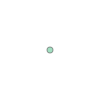

In [24]:
new_points[0][0]

In [26]:
get_size_station(new_points)

[(<shapely.geometry.point.Point at 0x1b877a00ee0>, 'large'),
 (<shapely.geometry.point.Point at 0x1b877a01060>, 'large'),
 (<shapely.geometry.point.Point at 0x1b877a019c0>, 'medium'),
 (<shapely.geometry.point.Point at 0x1b877a00160>, 'medium'),
 (<shapely.geometry.point.Point at 0x1b877a03d60>, 'large'),
 (<shapely.geometry.point.Point at 0x1b877a03df0>, 'large'),
 (<shapely.geometry.point.Point at 0x1b877a039d0>, 'medium'),
 (<shapely.geometry.point.Point at 0x1b877a03e20>, 'small'),
 (<shapely.geometry.point.Point at 0x1b877a027a0>, 'large'),
 (<shapely.geometry.point.Point at 0x1b877a03dc0>, 'large'),
 (<shapely.geometry.point.Point at 0x1b877a03be0>, 'large'),
 (<shapely.geometry.point.Point at 0x1b877a02ef0>, 'medium'),
 (<shapely.geometry.point.Point at 0x1b877a03040>, 'large'),
 (<shapely.geometry.point.Point at 0x1b877a00130>, 'medium'),
 (<shapely.geometry.point.Point at 0x1b877a02cb0>, 'medium'),
 (<shapely.geometry.point.Point at 0x1b877a02b00>, 'small'),
 (<shapely.geometr

In [18]:
np.sum([1 for i, j, k, n in new_points if n == "large"]), np.sum([1 for i, j, k, n in new_points if n == "medium"]), np.sum([1 for i, j, k, n in new_points if n == "small"])

(14, 13, 27)

In [16]:
sorted_locations = list(zip(top_locations[0], top_locations[1]))
distances = {}
for i in range(len(sorted_locations)):
    distances.setdefault(i, [])
    for j in range(len(sorted_locations)):
        if sorted_locations[i][0].distance(sorted_locations[j][0]) <= 10000:
            distance = sorted_locations[i][0].distance(sorted_locations[j][0])
            distances[i].append((sorted_locations[j][0].xy[0][0], sorted_locations[j][0].xy[1][0]))
        

In [17]:
for key, values in distances.items():
    distances[key] = (values, len(values))

In [18]:
distances_test = {k:v[0] for k, v in sorted(distances.items(), key=lambda item: item[1][1], reverse=True)}

In [19]:
from itertools import chain
from shapely.geometry import Point

distances_reduced = {}
distances_val = {}
for i in range(len(distances_test)):
    if set(distances_test[i]).isdisjoint(set(list(chain(*list(distances_val.values()))))):
        distances_val[i] = distances_test[i]
        distances_reduced[i] = [Point(xy) for xy in distances_test[i]]

In [20]:
from shapely import geometry
from shapely.geometry import LineString
polygones = []
for key, values in distances_reduced.items():
    if len(values) == 1:
        point = values
    elif len(values) == 2:
        line = LineString([values[0], values[1]])
        point = line.centroid
    else:
        point = geometry.Polygon(values).centroid
    avg_score = np.mean([item[1] for item in sorted_locations if item[0] in values])
    #if not any(p.equals(point) for p, _ in polygones):
    polygones.append((point, avg_score, len(values)))

In [21]:
polygones

[([<shapely.geometry.point.Point at 0x18792be9210>], 25.49349444540339, 1),
 ([<shapely.geometry.point.Point at 0x18792bebd90>], 25.461620515642437, 1),
 ([<shapely.geometry.point.Point at 0x18792be9060>], 20.026898268395207, 1),
 ([<shapely.geometry.point.Point at 0x18792be8460>], 19.632502968951552, 1),
 ([<shapely.geometry.point.Point at 0x18792be87f0>], 23.72593723558913, 1),
 ([<shapely.geometry.point.Point at 0x18792be8520>], 22.71143898362324, 1),
 ([<shapely.geometry.point.Point at 0x18792be8ca0>], 20.634569320081187, 1),
 ([<shapely.geometry.point.Point at 0x18792be8490>], 15.785481314985706, 1),
 (<shapely.geometry.point.Point at 0x18792bea530>, 19.105731687609346, 2),
 ([<shapely.geometry.point.Point at 0x18792be93f0>], 22.076844567795035, 1),
 ([<shapely.geometry.point.Point at 0x18792be8910>], 22.641052673529465, 1),
 ([<shapely.geometry.point.Point at 0x18792be8580>], 21.631984043658832, 1),
 (<shapely.geometry.point.Point at 0x18792beb850>, 21.72219517668417, 3),
 ([<sha

In [22]:
len(top_locations)

61

In [23]:
len(polygones)

54

In [99]:
polygones

[(<shapely.geometry.point.Point at 0x15aa1883370>, 5),
 (<shapely.geometry.point.Point at 0x15aa1883b50>, 5),
 (<shapely.geometry.point.Point at 0x15b8d5baf20>, 5),
 (<shapely.geometry.point.Point at 0x15aa1883490>, 5),
 (<shapely.geometry.point.Point at 0x15aa1883ca0>, 5),
 (<shapely.geometry.point.Point at 0x15aa1883df0>, 5),
 (<shapely.geometry.point.Point at 0x15aa1883dc0>, 5),
 (<shapely.geometry.point.Point at 0x15aa1883a30>, 5),
 (<shapely.geometry.point.Point at 0x15aa1883eb0>, 5),
 (<shapely.geometry.point.Point at 0x15aa1883d00>, 5),
 (<shapely.geometry.point.Point at 0x15aa1883e80>, 5),
 (<shapely.geometry.point.Point at 0x15aa1883cd0>, 5),
 (<shapely.geometry.point.Point at 0x15aa1883fd0>, 5),
 (<shapely.geometry.point.Point at 0x15aa1883ee0>, 5),
 (<shapely.geometry.point.Point at 0x15aa1883f10>, 5),
 (<shapely.geometry.point.Point at 0x15aa1883d90>, 5),
 (<shapely.geometry.point.Point at 0x15aa1883e20>, 5),
 (<shapely.geometry.point.Point at 0x15aa1883fa0>, 5),
 (<shapely

Functions (Not needed anymore)

In [ ]:
# def clean_freight_df(df, on_load=True):
    
#     df = df[['TIME', 'TIME.1', '2021']]
    
#     if on_load:
#         freight_type = "number_onload"
#     else:
#         freight_type = "number_offload"
        
#     df.rename(columns={"TIME": "geo_code", "TIME.1": "geo_labels", "2021": freight_type}, inplace=True)
#     df = df.iloc[1:]
#     df_clean = df[df.geo_code.str.startswith("FR").fillna(False)]
#     df_clean.reset_index(inplace=True, drop=True)
    
#     df_clean[freight_type] = df_clean[freight_type].astype('str')
#     df_clean[freight_type] = df_clean[freight_type].str.replace('\.0*$', '', regex=True)
#     df_clean.loc[~(df_clean[freight_type].str.isdigit()), freight_type] = '0'
#     df_clean[freight_type] = df_clean[freight_type].astype('int')
    
#     return df_clean

# def department_region_map(path, df_fr):
#     df_dpts_region = pd.read_csv(path)
#     df_dpts_region.rename(columns={"dep_name":"geo_labels", "region_name":"new_region_name", "old_region_name": "region"}, inplace=True)
#     df_final = pd.merge(df_fr, df_dpts_region[["geo_labels", "region"]], how='left', on=['geo_labels'])
#     df_final = df_final[~(df_final.geo_labels.str.endswith(" "))]
#     return df_final

# def merge_freight(path, df_on, df_off):
    
#     df_onload_fr = clean_freight_df(df_on, on_load=True)
#     df_offload_fr = clean_freight_df(df_off, on_load=False)

#     df_fr = pd.merge(df_onload_fr, df_offload_fr, how='inner', on=['geo_code', 'geo_labels'])
#     df_fr['total_load'] = df_fr.number_offload + df_fr.number_onload 
    
#     df_fr['geo_labels'] = [c[0] for c in df_fr['geo_labels'].str.split("(")]
#     df_fr = department_region_map(path, df_fr)
#     df_fr = df_fr.groupby("region")["total_load"].sum().reset_index()
#     df_fr["full_load"] = df_fr["total_load"].sum()   
#     df_fr["perc_load"] = df_fr["total_load"]/df_fr["full_load"]

#     return df_fr

# def calculate_trucks_stations_peryear(df, year=2030):
    
#     autonomy_high_ms = market_share[0]/sum(market_share)
#     autonomy_medium_ms =market_share[1]/sum(market_share)
#     autonomy_low_ms = market_share[2]/sum(market_share)
#     autonomy_high_km = autonomy_share[0]
#     autonomy_medium_km = autonomy_share[1]
#     autonomy_low_km = autonomy_share[2]
    
#     if (year not in [2030, 2040]):
#         year = 2030
        
#     if year==2030:
#         H2_trucks_num = H2_trucks_2030
#     else:
#         H2_trucks_num = H2_trucks_2040
        
#     df["h2_num_"+str(year)] = H2_trucks_num*df["perc_load"]
#     df["R_"+str(year)+"_high_aut"] = autonomy_high_ms*df["h2_num_"+str(year)]*df["avg_distance_high_aut"]/autonomy_high_km
#     df["R_"+str(year)+"_mid_aut"] = autonomy_medium_ms*df["h2_num_"+str(year)]*df["avg_distance_midlow_aut"]/autonomy_medium_km
#     df["R_"+str(year)+"_low_aut"] = autonomy_low_ms*df["h2_num_"+str(year)]*df["avg_distance_midlow_aut"]/autonomy_low_km
#     df["R_"+str(year)+"_total"] = df["R_"+str(year)+"_high_aut"] + df["R_"+str(year)+"_mid_aut"] + df["R_"+str(year)+"_low_aut"]
#     df["C_"+str(year)] = open_time/avg_time_fill
    
#     return df
    
# def calculate_stations(df, year=2030):
    
#     if (year not in [2030, 2040]):
#         year = 2030
        
#     df["num_stations_"+str(year)] = (df["R_"+str(year)+"_total"] / df["C_"+str(year)]).round().astype(int)

#     return df

# def calculate_number_stations(df, length_to_use='longest_line'):
#     """_summary_

#     Args:
#         df : _description_
#         length_to_use : can be 'longest_line', 'diameter' or 'length_max'.

#     Returns:
#         _type_: _description_
#     """

#     if (length_to_use not in ['longest_line', 'diameter', 'length_max']):
#         length_to_use = 'longest_line'
        
#     df["max_length_drive"] = max_hours_drive*avg_speed_kmh
#     df[["length_max", "length_mean", "diameter", "longest_line"]] = df[["length_max", "length_mean", "diameter", "longest_line"]]/1e3
#     df["avg_distance_high_aut"] = df[["max_length_drive", length_to_use]].min(axis=1) # This would be updated either by diameter or longest point
#     df["avg_distance_midlow_aut"] = 0.6*df["avg_distance_high_aut"]#df_new[["max_length_drive", "length_mean"]].min(axis=1)
    
#     df = calculate_trucks_stations_peryear(df, year=2030)
#     df = calculate_trucks_stations_peryear(df, year=2040)
    
#     df = calculate_stations(df, year=2030)
#     df = calculate_stations(df, year=2040)

#     return df

Execute functions (Not needed)

In [ ]:
# path_conf = "params/config.json"
# conf = json.load(open(path_conf, "r"))
# locals().update(conf)

# df_on = pd.read_excel(path_on_freight, sheet_name='Sheet 1', skiprows=8)
# df_off = pd.read_excel(path_off_freight, sheet_name='Sheet 1', skiprows=8)

# df_fr = merge_freight(path_region_dpt_map, df_on, df_off)
# df_new = pd.merge(df, df_fr[["region", "perc_load"]], how="left", on="region")

# df_new = calculate_number_stations(df_new)

# display(df_fr.head(10))

# df_new.head(10)